# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [ ]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [ ]:
x = torch.zeros(8, 8)

In [ ]:
x

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
back = torch.cat((torch.arange(4, 1, -1), torch.arange(6, 4, -1), torch.arange(2, 5)))
back

tensor([4, 3, 2, 6, 5, 2, 3, 4])

In [ ]:
front = torch.ones(8)
front

tensor([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
x[0] = -back
x[1] = -front
x[-1] = front
x[-2] = back
x

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [ ]:
even = torch.arange(2, 21, 2)
odd = torch.arange(3, 22, 2)
z = even * odd
z = torch.mul(even,odd)
print(f'z = torch.mul(x,y):\n {z}\n')

z = torch.mul(x,y):
 tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])



1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [ ]:
tensor = torch.arange(1, 111).reshape(11, 10)
tensor = tensor[:, 0:7]
tensor

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [ ]:
n, m = 4, 5
a = torch.tensor([0, 1] * m)
b = torch.tensor([2, 3] * m)
x = torch.vstack((a[:m],b[:m]) * n)
x[:n]

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в тензорах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [ ]:
ar1 = torch.randint(0,10, size=(4,7))
ar2 = torch.randint(0,10, size=(4,7))
torch.max(ar1, ar2)

tensor([[9, 4, 7, 4, 6, 8, 7],
        [3, 7, 8, 9, 8, 5, 4],
        [5, 6, 3, 9, 3, 7, 1],
        [7, 3, 9, 5, 7, 5, 3]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [ ]:
x = torch.randint(0, 100, size=(20,))
sorted, indices = torch.sort(x)
indices[-2]

tensor(11)

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [ ]:
a = torch.arange(1,8)
b = torch.arange(0,101, 10).view(-1,1)
a + b

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [ ]:
a_2d = torch.tensor([[3, 3, 3], [4,4,4], [5,5,5]])
b_1d = torch.tensor([1, 2, 3]).view(-1,1)
a_2d - b_1d

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
tensor([1, 3, 5, 7])
```

In [ ]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
torch.nonzero(a == b).flatten()

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
tensor([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [ ]:
a_2d = torch.arange(9).view(3,3)
torch.flip(a_2d, [0, 1])

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
```

Ожидается результат:

```python
tensor([6, 9, 10])
```

In [ ]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
a[(a <= 10) & (a >= 5)]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `torch.arange(9).reshape(3,3)`

In [ ]:
x = torch.arange(9).reshape(3,3)
x[:, [0, 2, 1]]

tensor([[0, 2, 1],
        [3, 5, 4],
        [6, 8, 7]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [ ]:
x = torch.randint(0,10, size = (8, 10))
sorted, indexes = torch.sum(x, 1).sort()
print(x[indexes[0]],'\n', indexes[0])

tensor([0, 4, 4, 0, 3, 9, 1, 6, 3, 2]) 
 tensor(0)


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [ ]:
x = torch.randint(0, 101, size=(20,))
x

tensor([82, 15, 25, 53, 71, 57, 95, 23, 91, 23, 24,  7, 13,  4, 63, 45, 92, 25,
        67, 54])

In [ ]:
# Способ 1
y = torch.clamp(x, min=30, max=70)
y

tensor([70, 30, 30, 53, 70, 57, 70, 30, 70, 30, 30, 30, 30, 30, 63, 45, 70, 30,
        67, 54])

In [ ]:
# Способ 2
x[x > 70] = 70
x[x < 30] = 30
x

tensor([70, 30, 30, 53, 70, 57, 70, 30, 70, 30, 30, 30, 30, 30, 63, 45, 70, 30,
        67, 54])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [ ]:
a = torch.randint(0, 11, size=(30,3))
b = torch.randint(0, 11, size=(30,3))
a[a > b].sum().item()

272

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [ ]:
x = torch.randint(0, 10, size=(20, 20))
x

tensor([[1, 4, 8, 3, 3, 5, 2, 7, 6, 6, 1, 6, 5, 3, 8, 1, 6, 9, 3, 7],
        [5, 3, 8, 8, 9, 0, 8, 8, 7, 0, 1, 4, 1, 9, 7, 3, 5, 2, 2, 0],
        [1, 7, 4, 1, 4, 9, 4, 8, 3, 1, 5, 6, 9, 9, 2, 1, 0, 1, 7, 5],
        [6, 5, 0, 9, 1, 3, 1, 3, 3, 6, 5, 0, 3, 4, 0, 7, 6, 0, 0, 4],
        [8, 0, 2, 4, 1, 0, 4, 4, 9, 6, 5, 7, 4, 8, 2, 3, 9, 2, 3, 3],
        [9, 4, 1, 4, 8, 0, 1, 9, 3, 2, 4, 5, 8, 4, 4, 6, 7, 1, 0, 0],
        [7, 8, 3, 2, 6, 6, 5, 1, 3, 0, 2, 3, 9, 7, 9, 3, 5, 7, 5, 9],
        [7, 2, 5, 5, 9, 7, 5, 0, 2, 4, 0, 5, 4, 8, 4, 1, 2, 5, 0, 7],
        [3, 3, 8, 3, 7, 8, 7, 9, 1, 1, 3, 0, 0, 3, 5, 3, 1, 3, 3, 9],
        [4, 9, 4, 1, 0, 7, 3, 1, 3, 4, 5, 8, 4, 4, 5, 3, 0, 7, 0, 7],
        [4, 5, 2, 9, 6, 5, 0, 2, 1, 3, 1, 0, 0, 2, 2, 4, 0, 4, 7, 0],
        [0, 6, 0, 4, 2, 1, 4, 8, 8, 7, 3, 7, 5, 6, 2, 4, 6, 6, 7, 9],
        [0, 7, 5, 3, 9, 5, 5, 3, 1, 0, 1, 5, 5, 8, 1, 3, 7, 2, 6, 4],
        [7, 2, 1, 9, 6, 9, 5, 3, 7, 4, 2, 7, 7, 1, 9, 7, 1, 7, 7, 4],
        [7, 9, 0, 5,

In [ ]:
row = list(range(0,19))
col = list(range(1,20))
x[row, col]

tensor([4, 8, 1, 1, 0, 1, 1, 2, 1, 5, 0, 5, 8, 9, 1, 3, 7, 5, 2])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [ ]:
ar1 = torch.randint(0, 11, size=(5,10))
ar2 = torch.randint(0, 11, size=(5,10))
ar1

tensor([[3, 0, 1, 2, 9, 6, 1, 8, 7, 7],
        [5, 3, 9, 7, 6, 6, 1, 1, 1, 9],
        [4, 9, 6, 0, 2, 3, 1, 4, 4, 7],
        [5, 6, 5, 3, 0, 1, 0, 2, 0, 1],
        [3, 3, 4, 5, 2, 5, 9, 3, 8, 1]])

In [ ]:
ar2

tensor([[8, 6, 4, 9, 9, 5, 9, 1, 1, 7],
        [9, 0, 0, 3, 4, 1, 8, 2, 2, 2],
        [9, 8, 4, 3, 4, 4, 8, 5, 5, 0],
        [2, 3, 2, 9, 0, 8, 0, 4, 4, 9],
        [6, 1, 9, 1, 1, 2, 1, 0, 5, 9]])

In [ ]:
torch.where((ar1 != ar2), ar1, ar1*2)

tensor([[ 3,  0,  1,  2, 18,  6,  1,  8,  7, 14],
        [ 5,  3,  9,  7,  6,  6,  1,  1,  1,  9],
        [ 4,  9,  6,  0,  2,  3,  1,  4,  4,  7],
        [ 5,  6,  5,  3,  0,  1,  0,  2,  0,  1],
        [ 3,  3,  4,  5,  2,  5,  9,  3,  8,  1]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [ ]:
ar1 = torch.randint(0, 11, size = (4, 7))
ar2 = torch.randint(0, 11, size = (4, 7))
ar3 = torch.randint(0, 11, size = (4, 7))
ar1

tensor([[7, 7, 4, 0, 9, 3, 0],
        [1, 0, 3, 5, 3, 3, 9],
        [6, 3, 4, 5, 4, 5, 7],
        [7, 4, 4, 9, 8, 8, 0]])

In [ ]:
ar2

tensor([[1, 8, 8, 9, 9, 4, 0],
        [4, 8, 5, 1, 9, 8, 5],
        [7, 9, 1, 5, 0, 8, 6],
        [8, 6, 9, 0, 1, 1, 2]])

In [ ]:
ar3

tensor([[4, 8, 6, 0, 1, 8, 7],
        [8, 4, 8, 9, 8, 1, 2],
        [0, 0, 5, 4, 5, 2, 7],
        [1, 9, 6, 4, 8, 3, 7]])

In [ ]:
torch.where(((ar1 > ar2) & (ar1 < ar3)), 0, ar1)

tensor([[7, 7, 4, 0, 9, 3, 0],
        [1, 0, 3, 0, 3, 3, 9],
        [6, 3, 0, 5, 0, 5, 7],
        [7, 4, 4, 9, 8, 8, 0]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [ ]:
ar1 = torch.randint(0, 21, size = (20, 5))
ar1

tensor([[11, 15, 13,  9,  6],
        [ 5, 10, 16,  3,  5],
        [ 5,  9, 17,  6,  9],
        [13,  9, 13, 11, 17],
        [ 1, 10, 10,  1,  1],
        [ 3,  8,  6, 11, 14],
        [16,  9,  6,  0,  3],
        [ 8,  4,  0, 19, 18],
        [10,  8, 19, 13,  4],
        [ 1, 13, 18,  1, 13],
        [ 4,  8,  5, 14,  7],
        [ 8,  7,  4, 13, 13],
        [17, 15,  1, 12, 14],
        [ 9, 17,  0, 14, 19],
        [ 6,  5,  4, 11,  7],
        [ 8,  6,  0,  5,  6],
        [ 2,  1,  9, 19, 12],
        [12,  4, 16,  8, 16],
        [ 4, 15, 15,  1,  2],
        [ 0, 12, 19,  9, 14]])

In [ ]:
values, indices = torch.max(ar1, 1)
torch.bincount(indices)

tensor([3, 3, 6, 5, 3])

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [ ]:
ar1 = torch.rand(4, 7)
ar1

tensor([[0.2047, 0.9925, 0.4713, 0.3301, 0.8412, 0.0076, 0.9211],
        [0.3871, 0.5012, 0.2317, 0.0488, 0.4715, 0.9081, 0.5942],
        [0.6441, 0.5260, 0.1262, 0.8952, 0.6330, 0.2997, 0.5939],
        [0.9793, 0.2748, 0.4935, 0.2398, 0.2269, 0.8657, 0.3224]])

In [ ]:
torch.argmax(ar1)

tensor(1)

In [ ]:
ar1[torch.div(torch.argmax(ar1), 7, rounding_mode='floor'):, torch.argmax(ar1) % 7 + 1:] = 0
ar1[torch.div(torch.argmax(ar1), 7, rounding_mode='floor') + 1:, torch.argmax(ar1) % 7:] = 0
ar1

tensor([[0.2047, 0.9925, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3871, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6441, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9793, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [ ]:
a = torch.tensor([2, 3, 2, 2, 2, 1])
b = torch.zeros((len(a), a.max()))
b[torch.arange(0, len(a)), a - 1] = 1
b

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [ ]:
arr = torch.randint(0,101, size=(20,))
arr

tensor([ 8, 64, 10, 11, 42,  1, 26, 61, 13, 26, 99, 52, 49, 58,  4,  0, 10, 71,
        71,  3])

In [ ]:
values, counts = torch.unique(arr, return_counts= True)

In [ ]:
values[counts.argmax()].item()

10

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

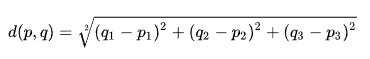

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([2, 4, 5])
torch.sum((b - a)**2)**(1/2)

tensor(3.)

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [36]:
A = torch.tensor([[-1., 2., 4.], [-3., 1., 2.], [-3., 0., 1.]])
B=torch.tensor([[3., -1.], [2., 1.]])
C=torch.tensor([[7., 21.], [11., 8.], [8., 4.]])

a_obr = torch.inverse(A)
b_obr = torch.inverse(B)
x = a_obr @ -C @ b_obr
x

tensor([[ 1.0000e+00,  1.1921e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 